In [281]:
# Reference from gfg https://www.geeksforgeeks.org/ann-self-organizing-neural-network-sonn-learning-algorithm/?ref=rp

import numpy as np
import matplotlib.pyplot as plt
import random

# **INITIALIZING RAW_DATA**

In [282]:
def Initialise_Train():
  X_train=[]

  for i in range(1500):

    one=random.random()
    two=random.random()
    temp=[]
    temp.append(2*one-1)
    temp.append(2*two-1)
    X_train.append(temp)

  X_train=np.array(X_train)
  return X_train

In [283]:
X_train=Initialise_Train()
print(X_train.shape)
print(X_train)

(1500, 2)
[[ 0.44336598 -0.0970708 ]
 [ 0.6931274   0.94721561]
 [ 0.22798702  0.29054033]
 ...
 [ 0.84020034  0.39326889]
 [ 0.12248526 -0.37408972]
 [-0.80064407  0.07345619]]


# **INITIALIZING WEIGHT**

In [284]:
def Initialise_Weight():
  weight=[]
  for i in range(10):
    temp=[]
    for j in range(10):
      temp1=[]
      one = random.random()
      two = random.random()
      temp1.append(2*one-1)
      temp1.append(2*two-1)
      temp.append(temp1)

    weight.append(temp)
  
  weight=np.array(weight)
  return weight

In [285]:
Weight=Initialise_Weight()
print(Weight.shape)
# print(Weight)

(10, 10, 2)


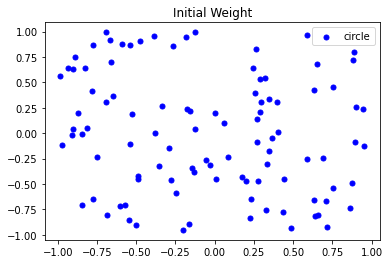

In [286]:
# Ploting the Initial Weight Matrix

x=Weight[:,:,0].flatten()
y=Weight[:,:,1].flatten()

plt.scatter(x, y, label='circle',c='b',marker= ".", s=100)
plt.title('Initial Weight')  
plt.legend()
plt.show()

# **TRAINING THE NETWOK (ALGORITHM)**

In [287]:
def radius_decay(initial_radius,i,lambd):
  return initial_radius*np.exp(-i/lambd)

In [288]:
def alpha_decay(initial_alpha,i,tot_ite):
  return initial_alpha*np.exp(-i/tot_ite)

In [289]:
def Calculate_degree_influence(distance,new_radius):
  return np.exp(-distance/(2*(new_radius**2)))

In [290]:
def Calculate_BMU(X_val,Weight):

  bmu_index=np.array([0,0])
  min_distance=100000.0

  for i in range(Weight.shape[0]):
    for j in range(Weight.shape[1]):

      Weight_val=Weight[i][j]
      diff_val=X_val-Weight_val

      distance=np.linalg.norm(diff_val)

      if distance<min_distance:
        min_distance=distance
        bmu_index=np.array([i,j])

  # print(bmu_index)
  # print(min_distance)

  return bmu_index

In [291]:
def Update_Weight(bmu_index,X_val,Weight,new_radius,new_alpha):

  for i in range(Weight.shape[0]):
    for j in range(Weight.shape[1]):

      curr_index=np.array((i,j))
      diff=bmu_index-curr_index
      distance=np.linalg.norm(diff)

      if distance <= new_radius:

        degree_influence=Calculate_degree_influence(distance,new_radius)
        delta=X_val-Weight[i][j]
        Weight[i][j] = Weight[i][j] + (degree_influence*new_alpha*delta)
  
  return Weight

In [292]:
def plot_graph(i,Weight,axes,axi,axj):

    a=Weight[:,:,0].flatten()
    b=Weight[:,:,1].flatten()
    if i==0:
      axes[axi,axj].set_title('At 0th iteration') 
      axes[axi,axj].scatter(a, b)
      axj=axj+1
    if i==100:
      axes[axi,axj].set_title('At 100th iteration')
      axes[axi,axj].scatter(a, b)
      axj=axj+1
    if i==1000:
      axes[axi,axj].set_title('At 1000th iteration')
      axes[axi,axj].scatter(a, b)
      axi=axi+1
      axj=0
    if i==2500:
      axes[axi,axj].set_title('At 2500th iteration')
      axes[axi,axj].scatter(a, b)
      axj=axj+1
    if i==4000:
      axes[axi,axj].set_title('At 4000th iteration')
      axes[axi,axj].scatter(a, b)
      axj=axj+1
    if i==5000:
      axes[axi,axj].set_title('At 5000th iteration')
      axes[axi,axj].scatter(a, b)
    
    return axi,axj

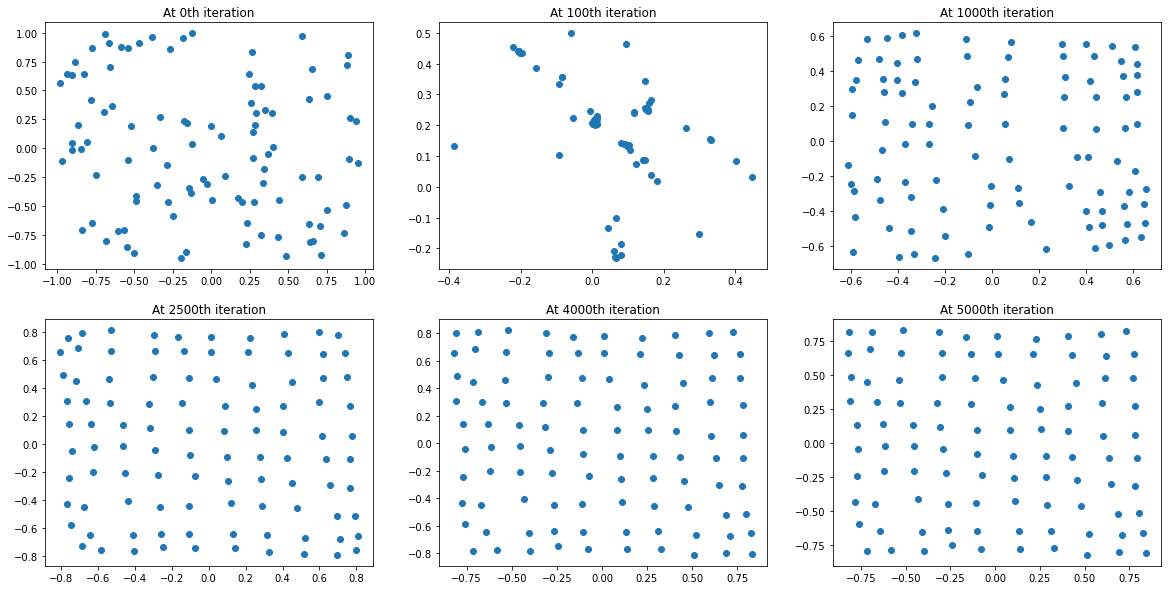

In [293]:
def Training_algo(X_train,Weight):

  #learning rate
  initial_alpha=0.1 

  # radius constant
  lambd=1000

  initial_radius=10
  tot_ite=X_train.shape[0]

  fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(20,10))
  axi=0
  axj=0

  for i in range(5000+1):

    axi,axj=plot_graph(i,Weight,axes,axi,axj)

    index = random.randint(0,len(X_train)-1)
    X_val = X_train[index]

    #BMU_index
    bmu_index=Calculate_BMU(X_val,Weight)

    # SOM parameter
    new_radius=radius_decay(initial_radius,i,lambd)

    new_alpha=alpha_decay(initial_alpha,i,tot_ite)

    #Weight_update
    Weight=Update_Weight(bmu_index,X_val,Weight,new_radius,new_alpha)
  
  return Weight

Weight=Training_algo(X_train,Weight)

# **TESTING THE NETWORK (ALGORITHM)**

In [294]:
#   X1=[0.1  0.8]T,  X2=[0.5  -0.2]T, X3=[-0.8  -0.9]T, X4=[-0.0.6  0.9]T.

Input=[[0.1,  0.8],
       [0.5, -0.2],
       [-0.8,-0.9],
       [-0.06,0.9]]
Input=np.array(Input)
print(Input)

[[ 0.1   0.8 ]
 [ 0.5  -0.2 ]
 [-0.8  -0.9 ]
 [-0.06  0.9 ]]


In [295]:
def Calculate_testing_BMU(input_val,Weight):

  bmu_index=np.array([0,0])
  min_distance=100000.0

  for i in range(Weight.shape[0]):
    for j in range(Weight.shape[1]):

      Weight_val=Weight[i][j]
      diff_val=input_val-Weight_val

      distance=np.linalg.norm(diff_val)

      if distance<min_distance:
        min_distance=distance
        bmu_index=np.array([i,j])
  
  return min_distance,bmu_index

In [296]:
def Testing_algo(Input,Weight):

  ans=[]
  for i in range(Input.shape[0]):

    input_val=Input[i]
    
    min_distance,bmu_index=Calculate_testing_BMU(input_val,Weight)
    ans.append((bmu_index,min_distance))

  return ans

In [297]:
ans=Testing_algo(Input,Weight)
print(ans)

[(array([0, 4]), 0.09176399439037457), (array([6, 2]), 0.08439710606454932), (array([9, 9]), 0.13400719222910953), (array([0, 4]), 0.13656585766284246)]


In [298]:
for i in range(4):
  print(" ")
  print("For "+str(i)+" input:      ",Input[i])
  print("Distance:         ",ans[i][1])
  print("Belongs to:       ",ans[i][0])
  x=ans[i][0][0]
  y=ans[i][0][1]
  print("Activated Neuron: ",Weight[x][y])

 
For 0 input:       [0.1 0.8]
Distance:          0.09176399439037457
Belongs to:        [0 4]
Activated Neuron:  [0.00988704 0.78267125]
 
For 1 input:       [ 0.5 -0.2]
Distance:          0.08439710606454932
Belongs to:        [6 2]
Activated Neuron:  [ 0.45765606 -0.27300591]
 
For 2 input:       [-0.8 -0.9]
Distance:          0.13400719222910953
Belongs to:        [9 9]
Activated Neuron:  [-0.71703555 -0.794763  ]
 
For 3 input:       [-0.06  0.9 ]
Distance:          0.13656585766284246
Belongs to:        [0 4]
Activated Neuron:  [0.00988704 0.78267125]


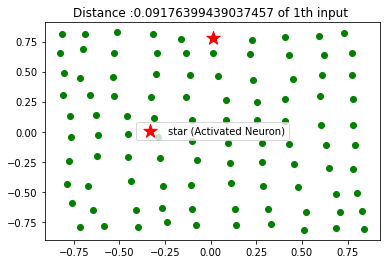

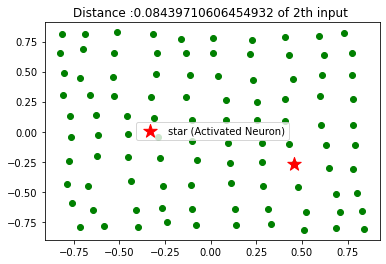

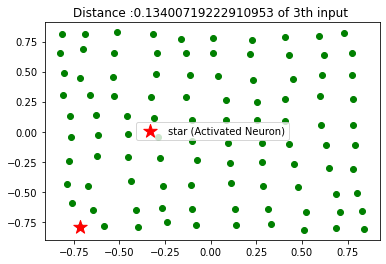

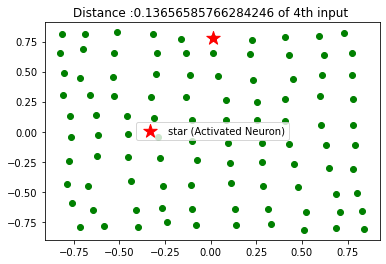

In [299]:
a=Weight[:,:,0].flatten()
b=Weight[:,:,1].flatten()

for i in range(4):
  x=ans[i][0][0]
  y=ans[i][0][1]
  plt.scatter(a,b,c='g')
  xx=Weight[x][y]
  plt.scatter(xx[0],xx[1],label='star (Activated Neuron)',c='r',marker= "*", s=200)
  plt.title('Distance :'+str(ans[i][1])+ ' of '+str(i+1)+'th input ') 
  plt.legend()
  plt.show()